First, use the functions previously designed to obtain the desired characteristics.



Later, the RMS in the Time domain will be extracted to a different file. To be used in later approaches too.

# Imports and definitions

In [ ]:
# importing packages
import pandas as pd
import glob
import numpy as np
import scipy as sp
from scipy.stats import kurtosis, skew
# Importing matplotlib to plot the graphs.
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone
from natsort import index_natsorted

## Functions from previous experiments

In [ ]:
def readFiles(folderpath):
  folder_path = folderpath
  file_list = glob.glob(folder_path + "/*")
  res_dataframe = pd.DataFrame(pd.read_table(file_list[0], header = None))

  for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], header = None)
    df = pd.DataFrame(data)
    res_dataframe = pd.concat([res_dataframe, df] )#, axis = 1)

  names = []
  for path in file_list:
    names.append(path.split("/")[-1])

  return res_dataframe, names

In [ ]:
def rms(array):
  return np.sqrt(np.mean(array**2))

In [ ]:
def computeFunctions(df, filename = "Archivo 1", functions = []):
  index = []
  for i in range(0,df.shape[1]):
    index.append("{}: CH{}".format(filename,i))
  if len(functions) ==0 :
    functions = [np.mean, np.std, kurtosis, skew, rms, max, min]
  columns = [f.__name__ for f in functions]

  result = pd.DataFrame(columns = columns,
                      index = index)

  for i in range(0,df.shape[1]):
    for f in functions:
      data = f(df.iloc[:,i])
      result.loc["{}: CH{}".format(filename,i),f.__name__] = data

  return result

In [ ]:
def computeFiles(path, amount = -1, functions = []):
  folder_path = path
  file_list = glob.glob(folder_path + "/*")

  filenames = []
  for filepath in file_list:
    filenames.append(filepath.split("/")[-1])

  df = pd.DataFrame(pd.read_table(file_list[0], header = None))
  res = computeFunctions(df, filename = filenames[0] , functions = functions)

  if (amount <0 or amount > len(file_list)):
    amount = len(file_list)

  for i in range(1, amount):
    temp_df = computeFunctions(
        pd.DataFrame(pd.read_table(file_list[i], header = None)),
        filename = filenames[i],
        functions = []
    )
    res = res.append(temp_df)
    print("Progress: {}/{}".format(i+1,amount))

  return res

## New Functions

In [ ]:
def computeRMS(df, filename):
  # For the df given, index = filename, column = channel
  index = [filename]
  columns = range(0,df.shape[1])

  result = pd.DataFrame(columns = columns,
                        index = index)

  for i in range(0,df.shape[1]):
    data = rms(df.iloc[:,i])
    result.loc[filename,i] = data



  return result

In [ ]:
def computeFilesRMS(path, amount = -1):
  # First get the files
  folder_path = path
  file_list = glob.glob(folder_path + "/*")

  filenames = []
  for filepath in file_list:
    filenames.append(filepath.split("/")[-1])

  print("Progress: Done loading files")

  # Do the task for the first file
  df = pd.DataFrame(pd.read_table(file_list[0], header = None))
  res = computeRMS(df, filename = filenames[0])


  # And then for the rest
  if (amount <0 or amount > len(file_list)):
    amount = len(file_list)
  print("Progress: {}/{}".format(1,amount))

  for i in range(1, amount):
    temp_df = computeRMS(
        pd.DataFrame(pd.read_table(file_list[i], header = None)),
        filename = filenames[i],
    )
    res = res.append(temp_df)
    print("Progress: {}/{}".format(i+1,amount))


  return res

In [ ]:
test = pd.DataFrame(columns = range(0, 8),
             index = ["filename"])
test

,0,1,2,3,4,5,6,7
filename,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def parseFilenameToDate(Filename):
  new_str = Filename.replace(".","/")
  dt = datetime.strptime(new_str, "%Y/%m/%d/%H/%M/%S")
  return dt

In [ ]:
dt = parseFilenameToDate("2003.11.16.06.58.46")
dt

datetime.datetime(2003, 11, 16, 6, 58, 46)

## Better functions

Developed on future approaches, but useful here

In [ ]:
def computeFilesVelocityRMS(path, amount = -1):
  # First get the files
  folder_path = path
  file_list = glob.glob(folder_path + "/*")

  filenames = []
  for filepath in file_list:
    filenames.append(filepath.split("/")[-1])

  print("Progress: Done loading files")

  # Do the task for the first file
  df = pd.DataFrame(pd.read_table(file_list[0], header = None))
  res = computeVelocityRMS(df, filename = filenames[0])


  # And then for the rest
  if (amount <0 or amount > len(file_list)):
    amount = len(file_list)
  print("Progress: {}/{}".format(1,amount))

  for i in range(1, amount):
    temp_df = computeVelocityRMS(
        pd.DataFrame(pd.read_table(file_list[i], header = None)),
        filename = filenames[i],
    )
    res = res.append(temp_df)
    print("Progress: {}/{}".format(i+1,amount))


  return res

In [ ]:
def computeVelocityRMS(df, filename):
  # For the df given, index = filename, column = channel
  index = [filename]
  columns = range(0,df.shape[1])

  result = pd.DataFrame(columns = columns,
                        index = index)

  for i in range(0,df.shape[1]):
    data = speed_rms_from_acceleration(df.iloc[:,i], 20480)
    result.loc[filename,i] = data



  return result

In [ ]:
def speed_rms_from_acceleration(data, fs):
  """
  Data is an array like, fs the sampling frequency

  Data is assumed that is measured in g
  """
  # First center the data using the mean to cancel out gravity
  mean_values = data.mean()
  data = data - mean_values

  # Perform the operations
  G = 9.80665
  accel = G * data * 1000

  velocity = sp.integrate.cumulative_trapezoid(accel, dx = 1/fs, initial = 0)

  return rms(velocity)

# Old tests
For the previously designed functions. Can be left out of execution

In [ ]:
result = computeFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/test1', amount = 3)

Progress: 2/3
Progress: 3/3


In [ ]:
result

,mean,std,kurtosis,skew,rms,max,min
2003.11.16.06.58.46: CH0,-0.118469,0.097826,0.879857,-0.039519,0.153639,0.483,-0.688
2003.11.16.06.58.46: CH1,-0.119506,0.089263,1.140088,0.090826,0.149163,0.654,-0.654
2003.11.16.06.58.46: CH2,-0.11776,0.092779,0.315984,-0.061028,0.149918,0.31,-0.791
2003.11.16.06.58.46: CH3,-0.118254,0.07583,0.362793,-0.01728,0.140479,0.234,-0.508
2003.11.16.06.58.46: CH4,-0.115443,0.113252,0.568761,0.024861,0.161719,0.461,-0.698
2003.11.16.06.58.46: CH5,-0.115118,0.119898,0.555058,-0.016134,0.166215,0.522,-0.884
2003.11.16.06.58.46: CH6,-0.114694,0.076305,0.698221,-0.004425,0.137758,0.291,-0.571
2003.11.16.06.58.46: CH7,-0.113825,0.079905,0.62012,0.001561,0.139072,0.32,-0.503
2003.11.16.07.38.46: CH0,-0.116214,0.096984,1.008371,0.008472,0.151366,0.417,-0.825
2003.11.16.07.38.46: CH1,-0.116402,0.088075,0.754524,0.046039,0.145968,0.369,-0.635


In [ ]:
result = computeFiles('/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/test1', amount = 3, functions = [rms])

Progress: 2/3
Progress: 3/3


In [ ]:
result

,rms
2003.11.16.06.58.46: CH0,0.153639
2003.11.16.06.58.46: CH1,0.149163
2003.11.16.06.58.46: CH2,0.149918
2003.11.16.06.58.46: CH3,0.140479
2003.11.16.06.58.46: CH4,0.161719
2003.11.16.06.58.46: CH5,0.166215
2003.11.16.06.58.46: CH6,0.137758
2003.11.16.06.58.46: CH7,0.139072
2003.11.16.07.38.46: CH0,0.151366
2003.11.16.07.38.46: CH1,0.145968


Index(['2003.11.16.06.58.46: CH0', '2003.11.16.06.58.46: CH1',
       '2003.11.16.06.58.46: CH2', '2003.11.16.06.58.46: CH3',
       '2003.11.16.06.58.46: CH4', '2003.11.16.06.58.46: CH5',
       '2003.11.16.06.58.46: CH6', '2003.11.16.06.58.46: CH7',
       '2003.11.16.07.38.46: CH0', '2003.11.16.07.38.46: CH1',
       '2003.11.16.07.38.46: CH2', '2003.11.16.07.38.46: CH3',
       '2003.11.16.07.38.46: CH4', '2003.11.16.07.38.46: CH5',
       '2003.11.16.07.38.46: CH6', '2003.11.16.07.38.46: CH7',
       '2003.11.16.06.48.46: CH0', '2003.11.16.06.48.46: CH1',
       '2003.11.16.06.48.46: CH2', '2003.11.16.06.48.46: CH3',
       '2003.11.16.06.48.46: CH4', '2003.11.16.06.48.46: CH5',
       '2003.11.16.06.48.46: CH6', '2003.11.16.06.48.46: CH7'],
      dtype='object')

# Characteristics Overview

Compare the first and last file's characteristics, for all channels

For this, those files were selected and saved in a different folder

In [ ]:
folder_name = "Test1-FirstLast"

### Computations

In [ ]:
path_to_folder = f"/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/{folder_name}"

In [ ]:
result = computeFiles(path_to_folder, amount=2)

Progress: 2/2


<ipython-input-13-e05b1a3dde58>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)


### Result

In [ ]:
result

,mean,std,kurtosis,skew,rms,max,min
2003.10.22.12.06.24: CH0,-0.094593,0.081122,1.069163,-0.029993,0.124614,0.388,-0.72
2003.10.22.12.06.24: CH1,-0.09388,0.070648,3.065884,0.220116,0.117493,0.701,-0.564
2003.10.22.12.06.24: CH2,-0.093817,0.090648,0.209486,-0.092073,0.130455,0.359,-0.674
2003.10.22.12.06.24: CH3,-0.093752,0.077508,0.292221,-0.053183,0.121642,0.256,-0.53
2003.10.22.12.06.24: CH4,-0.090812,0.091461,0.405439,0.034372,0.128887,0.4,-0.496
2003.10.22.12.06.24: CH5,-0.090881,0.095486,0.777063,-0.022223,0.131821,0.415,-0.784
2003.10.22.12.06.24: CH6,-0.090969,0.060085,0.79025,0.046609,0.10902,0.249,-0.413
2003.10.22.12.06.24: CH7,-0.094235,0.06638,1.80799,0.008295,0.115267,0.374,-0.471
2003.11.25.23.39.56: CH0,-0.117158,0.128892,0.557575,-0.040126,0.174181,0.63,-0.808
2003.11.25.23.39.56: CH1,-0.11681,0.10638,0.571086,0.065542,0.157991,0.518,-0.632


# New Tests and compute RMS dataset
For new functions. Compute new dataset containing RMS for each Channel.

WARNING: Takes its time!

In [ ]:
test_to_use = "2nd_test"

### Acceleration RMS

In [ ]:
computeFilesRMS(f'/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/{test_to_use}', amount= 10)

Progress: Done loading files
Progress: 1/10
Progress: 2/10
Progress: 3/10
Progress: 4/10
Progress: 5/10
Progress: 6/10
Progress: 7/10
Progress: 8/10
Progress: 9/10
Progress: 10/10


,0,1,2,3,4,5,6,7
2003.11.16.06.58.46,0.153639,0.149163,0.149918,0.140479,0.161719,0.166215,0.137758,0.139072
2003.11.16.07.38.46,0.151366,0.145968,0.147602,0.138433,0.16126,0.162983,0.135839,0.138224
2003.11.16.06.48.46,0.152085,0.1455,0.149149,0.13931,0.160837,0.163708,0.135535,0.138861
2003.11.16.08.18.46,0.153901,0.147142,0.149259,0.139399,0.160941,0.163987,0.135776,0.138306
2003.11.16.07.58.46,0.152777,0.147245,0.149654,0.140005,0.161022,0.164642,0.136333,0.138483
2003.11.16.06.38.46,0.15314,0.147312,0.149406,0.139351,0.162778,0.165238,0.136322,0.138225
2003.11.16.06.18.46,0.153063,0.146705,0.14967,0.14013,0.162971,0.165284,0.136085,0.1398
2003.11.16.06.28.46,0.153833,0.148013,0.151056,0.140304,0.16238,0.164233,0.136331,0.140671
2003.11.16.10.48.46,0.153665,0.147011,0.14918,0.139373,0.160328,0.163873,0.134824,0.139677
2003.11.16.09.38.46,0.153064,0.146955,0.149439,0.139197,0.160729,0.163279,0.134774,0.137257


In [ ]:
result = computeFilesRMS(f'/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/{test_to_use}')

Progress: Done loading files
Progress: 1/2156
Progress: 2/2156
Progress: 3/2156
Progress: 4/2156
Progress: 5/2156
Progress: 6/2156
Progress: 7/2156
Progress: 8/2156
Progress: 9/2156
Progress: 10/2156
Progress: 11/2156
Progress: 12/2156
Progress: 13/2156
Progress: 14/2156
Progress: 15/2156
Progress: 16/2156
Progress: 17/2156
Progress: 18/2156
Progress: 19/2156
Progress: 20/2156
Progress: 21/2156
Progress: 22/2156
Progress: 23/2156
Progress: 24/2156
Progress: 25/2156
Progress: 26/2156
Progress: 27/2156
Progress: 28/2156
Progress: 29/2156
Progress: 30/2156
Progress: 31/2156
Progress: 32/2156
Progress: 33/2156
Progress: 34/2156
Progress: 35/2156
Progress: 36/2156
Progress: 37/2156
Progress: 38/2156
Progress: 39/2156
Progress: 40/2156
Progress: 41/2156
Progress: 42/2156
Progress: 43/2156
Progress: 44/2156
Progress: 45/2156
Progress: 46/2156
Progress: 47/2156
Progress: 48/2156
Progress: 49/2156
Progress: 50/2156
Progress: 51/2156
Progress: 52/2156
Progress: 53/2156
Progress: 54/2156
Progress

In [ ]:
result

,0,1,2,3,4,5,6,7
2003.11.16.06.58.46,0.153639,0.149163,0.149918,0.140479,0.161719,0.166215,0.137758,0.139072
2003.11.16.07.38.46,0.151366,0.145968,0.147602,0.138433,0.16126,0.162983,0.135839,0.138224
2003.11.16.06.48.46,0.152085,0.1455,0.149149,0.13931,0.160837,0.163708,0.135535,0.138861
2003.11.16.08.18.46,0.153901,0.147142,0.149259,0.139399,0.160941,0.163987,0.135776,0.138306
2003.11.16.07.58.46,0.152777,0.147245,0.149654,0.140005,0.161022,0.164642,0.136333,0.138483
...,...,...,...,...,...,...,...,...
2003.10.23.08.44.13,0.130833,0.121018,0.130776,0.12256,0.131232,0.134487,0.112363,0.115306
2003.10.23.09.04.13,0.131585,0.12197,0.131505,0.121759,0.131724,0.134603,0.112564,0.11477
2003.10.23.09.14.13,0.129716,0.121513,0.130473,0.121606,0.131293,0.133542,0.112503,0.11551
2003.10.23.08.34.13,0.130259,0.122047,0.132122,0.122203,0.131888,0.133946,0.11213,0.115425


In [ ]:
result.to_csv(f"/content/drive/MyDrive/Colab Notebooks/TFG/Trasteo/timeRMS-{test_to_use}.csv")

### Velocity RMS

In [ ]:
computeFilesVelocityRMS(f'/content/drive/MyDrive/{test_to_use}', amount= 10)

Progress: Done loading files
Progress: 1/10
Progress: 2/10
Progress: 3/10
Progress: 4/10
Progress: 5/10
Progress: 6/10
Progress: 7/10


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 8/10


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)


Progress: 9/10
Progress: 10/10


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)


,0,1,2,3
2004.02.12.10.42.39,1.579103,1.413506,2.276786,1.082238
2004.02.12.11.22.39,0.827692,0.782831,1.256357,1.761797
2004.02.12.12.22.39,0.940373,1.202879,2.317534,2.194585
2004.02.12.13.22.39,1.173243,1.429123,1.252211,2.667121
2004.02.12.12.02.39,0.864917,0.976204,2.604701,2.360595
2004.02.12.13.02.39,0.923301,1.66385,2.740352,3.484645
2004.02.12.12.42.39,1.080297,1.588822,1.710157,1.930524
2004.02.12.10.32.39,1.298048,2.091562,1.397244,2.609743
2004.02.12.11.32.39,1.88039,2.098241,1.299959,1.6563
2004.02.12.12.32.39,1.171758,0.918604,1.578565,1.30083


In [ ]:
result = computeFilesVelocityRMS(f'/content/drive/MyDrive/{test_to_use}')

<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)


Progress: Done loading files
Progress: 1/984
Progress: 2/984
Progress: 3/984
Progress: 4/984
Progress: 5/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 6/984
Progress: 7/984
Progress: 8/984
Progress: 9/984
Progress: 10/984
Progress: 11/984
Progress: 12/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 13/984
Progress: 14/984
Progress: 15/984
Progress: 16/984
Progress: 17/984
Progress: 18/984
Progress: 19/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 20/984
Progress: 21/984
Progress: 22/984
Progress: 23/984
Progress: 24/984
Progress: 25/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 26/984
Progress: 27/984
Progress: 28/984
Progress: 29/984
Progress: 30/984
Progress: 31/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 32/984
Progress: 33/984
Progress: 34/984
Progress: 35/984
Progress: 36/984
Progress: 37/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 38/984
Progress: 39/984
Progress: 40/984
Progress: 41/984
Progress: 42/984
Progress: 43/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 44/984
Progress: 45/984
Progress: 46/984
Progress: 47/984
Progress: 48/984
Progress: 49/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 50/984
Progress: 51/984
Progress: 52/984
Progress: 53/984
Progress: 54/984
Progress: 55/984
Progress: 56/984
Progress: 57/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 58/984
Progress: 59/984
Progress: 60/984
Progress: 61/984
Progress: 62/984
Progress: 63/984
Progress: 64/984
Progress: 65/984
Progress: 66/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 67/984
Progress: 68/984
Progress: 69/984
Progress: 70/984
Progress: 71/984
Progress: 72/984
Progress: 73/984
Progress: 74/984
Progress: 75/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 76/984
Progress: 77/984
Progress: 78/984
Progress: 79/984
Progress: 80/984
Progress: 81/984
Progress: 82/984
Progress: 83/984
Progress: 84/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 85/984
Progress: 86/984
Progress: 87/984
Progress: 88/984
Progress: 89/984
Progress: 90/984
Progress: 91/984
Progress: 92/984
Progress: 93/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 94/984
Progress: 95/984
Progress: 96/984
Progress: 97/984
Progress: 98/984
Progress: 99/984
Progress: 100/984
Progress: 101/984
Progress: 102/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 103/984
Progress: 104/984
Progress: 105/984
Progress: 106/984
Progress: 107/984
Progress: 108/984
Progress: 109/984
Progress: 110/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 111/984
Progress: 112/984
Progress: 113/984
Progress: 114/984
Progress: 115/984
Progress: 116/984
Progress: 117/984
Progress: 118/984
Progress: 119/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 120/984
Progress: 121/984
Progress: 122/984
Progress: 123/984
Progress: 124/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 125/984
Progress: 126/984
Progress: 127/984
Progress: 128/984
Progress: 129/984
Progress: 130/984
Progress: 131/984
Progress: 132/984
Progress: 133/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 134/984
Progress: 135/984
Progress: 136/984
Progress: 137/984
Progress: 138/984
Progress: 139/984
Progress: 140/984
Progress: 141/984
Progress: 142/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 143/984
Progress: 144/984
Progress: 145/984
Progress: 146/984
Progress: 147/984
Progress: 148/984
Progress: 149/984
Progress: 150/984
Progress: 151/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 152/984
Progress: 153/984
Progress: 154/984
Progress: 155/984
Progress: 156/984
Progress: 157/984
Progress: 158/984
Progress: 159/984
Progress: 160/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 161/984
Progress: 162/984
Progress: 163/984
Progress: 164/984
Progress: 165/984
Progress: 166/984
Progress: 167/984
Progress: 168/984
Progress: 169/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 170/984
Progress: 171/984
Progress: 172/984
Progress: 173/984
Progress: 174/984
Progress: 175/984
Progress: 176/984
Progress: 177/984
Progress: 178/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 179/984
Progress: 180/984
Progress: 181/984
Progress: 182/984
Progress: 183/984
Progress: 184/984
Progress: 185/984
Progress: 186/984
Progress: 187/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 188/984
Progress: 189/984
Progress: 190/984
Progress: 191/984
Progress: 192/984
Progress: 193/984
Progress: 194/984
Progress: 195/984
Progress: 196/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 197/984
Progress: 198/984
Progress: 199/984
Progress: 200/984
Progress: 201/984
Progress: 202/984
Progress: 203/984
Progress: 204/984
Progress: 205/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 206/984
Progress: 207/984
Progress: 208/984
Progress: 209/984
Progress: 210/984
Progress: 211/984
Progress: 212/984
Progress: 213/984
Progress: 214/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 215/984
Progress: 216/984
Progress: 217/984
Progress: 218/984
Progress: 219/984
Progress: 220/984
Progress: 221/984
Progress: 222/984
Progress: 223/984
Progress: 224/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 225/984
Progress: 226/984
Progress: 227/984
Progress: 228/984
Progress: 229/984
Progress: 230/984
Progress: 231/984
Progress: 232/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 233/984
Progress: 234/984
Progress: 235/984
Progress: 236/984
Progress: 237/984
Progress: 238/984
Progress: 239/984
Progress: 240/984
Progress: 241/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 242/984
Progress: 243/984
Progress: 244/984
Progress: 245/984
Progress: 246/984
Progress: 247/984
Progress: 248/984
Progress: 249/984
Progress: 250/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 251/984
Progress: 252/984
Progress: 253/984
Progress: 254/984
Progress: 255/984
Progress: 256/984
Progress: 257/984
Progress: 258/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 259/984
Progress: 260/984
Progress: 261/984
Progress: 262/984
Progress: 263/984
Progress: 264/984
Progress: 265/984
Progress: 266/984
Progress: 267/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 268/984
Progress: 269/984
Progress: 270/984
Progress: 271/984
Progress: 272/984
Progress: 273/984
Progress: 274/984
Progress: 275/984
Progress: 276/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 277/984
Progress: 278/984
Progress: 279/984
Progress: 280/984
Progress: 281/984
Progress: 282/984
Progress: 283/984
Progress: 284/984
Progress: 285/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 286/984
Progress: 287/984
Progress: 288/984
Progress: 289/984
Progress: 290/984
Progress: 291/984
Progress: 292/984
Progress: 293/984
Progress: 294/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 295/984
Progress: 296/984
Progress: 297/984
Progress: 298/984
Progress: 299/984
Progress: 300/984
Progress: 301/984
Progress: 302/984
Progress: 303/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 304/984
Progress: 305/984
Progress: 306/984
Progress: 307/984
Progress: 308/984
Progress: 309/984
Progress: 310/984
Progress: 311/984
Progress: 312/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 313/984
Progress: 314/984
Progress: 315/984
Progress: 316/984
Progress: 317/984
Progress: 318/984
Progress: 319/984
Progress: 320/984
Progress: 321/984
Progress: 322/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 323/984
Progress: 324/984
Progress: 325/984
Progress: 326/984
Progress: 327/984
Progress: 328/984
Progress: 329/984
Progress: 330/984
Progress: 331/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 332/984
Progress: 333/984
Progress: 334/984
Progress: 335/984
Progress: 336/984
Progress: 337/984
Progress: 338/984
Progress: 339/984
Progress: 340/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 341/984
Progress: 342/984
Progress: 343/984
Progress: 344/984
Progress: 345/984
Progress: 346/984
Progress: 347/984
Progress: 348/984
Progress: 349/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 350/984
Progress: 351/984
Progress: 352/984
Progress: 353/984
Progress: 354/984
Progress: 355/984
Progress: 356/984
Progress: 357/984
Progress: 358/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 359/984
Progress: 360/984
Progress: 361/984
Progress: 362/984
Progress: 363/984
Progress: 364/984
Progress: 365/984
Progress: 366/984
Progress: 367/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 368/984
Progress: 369/984
Progress: 370/984
Progress: 371/984
Progress: 372/984
Progress: 373/984
Progress: 374/984
Progress: 375/984
Progress: 376/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 377/984
Progress: 378/984
Progress: 379/984
Progress: 380/984
Progress: 381/984
Progress: 382/984
Progress: 383/984
Progress: 384/984
Progress: 385/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 386/984
Progress: 387/984
Progress: 388/984
Progress: 389/984
Progress: 390/984
Progress: 391/984
Progress: 392/984
Progress: 393/984
Progress: 394/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 395/984
Progress: 396/984
Progress: 397/984
Progress: 398/984
Progress: 399/984
Progress: 400/984
Progress: 401/984
Progress: 402/984
Progress: 403/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 404/984
Progress: 405/984
Progress: 406/984
Progress: 407/984
Progress: 408/984
Progress: 409/984
Progress: 410/984
Progress: 411/984
Progress: 412/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 413/984
Progress: 414/984
Progress: 415/984
Progress: 416/984
Progress: 417/984
Progress: 418/984
Progress: 419/984
Progress: 420/984
Progress: 421/984
Progress: 422/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 423/984
Progress: 424/984
Progress: 425/984
Progress: 426/984
Progress: 427/984
Progress: 428/984
Progress: 429/984
Progress: 430/984
Progress: 431/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 432/984
Progress: 433/984
Progress: 434/984
Progress: 435/984
Progress: 436/984
Progress: 437/984
Progress: 438/984
Progress: 439/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 440/984
Progress: 441/984
Progress: 442/984
Progress: 443/984
Progress: 444/984
Progress: 445/984
Progress: 446/984
Progress: 447/984
Progress: 448/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 449/984
Progress: 450/984
Progress: 451/984
Progress: 452/984
Progress: 453/984
Progress: 454/984
Progress: 455/984
Progress: 456/984
Progress: 457/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 458/984
Progress: 459/984
Progress: 460/984
Progress: 461/984
Progress: 462/984
Progress: 463/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 464/984
Progress: 465/984
Progress: 466/984
Progress: 467/984
Progress: 468/984
Progress: 469/984
Progress: 470/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 471/984
Progress: 472/984
Progress: 473/984
Progress: 474/984
Progress: 475/984
Progress: 476/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 477/984
Progress: 478/984
Progress: 479/984
Progress: 480/984
Progress: 481/984
Progress: 482/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 483/984
Progress: 484/984
Progress: 485/984
Progress: 486/984
Progress: 487/984
Progress: 488/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 489/984
Progress: 490/984
Progress: 491/984
Progress: 492/984
Progress: 493/984
Progress: 494/984
Progress: 495/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 496/984
Progress: 497/984
Progress: 498/984
Progress: 499/984
Progress: 500/984
Progress: 501/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 502/984
Progress: 503/984
Progress: 504/984
Progress: 505/984
Progress: 506/984
Progress: 507/984
Progress: 508/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 509/984
Progress: 510/984
Progress: 511/984
Progress: 512/984
Progress: 513/984
Progress: 514/984
Progress: 515/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 516/984
Progress: 517/984
Progress: 518/984
Progress: 519/984
Progress: 520/984
Progress: 521/984
Progress: 522/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 523/984
Progress: 524/984
Progress: 525/984
Progress: 526/984
Progress: 527/984
Progress: 528/984
Progress: 529/984
Progress: 530/984
Progress: 531/984
Progress: 532/984
Progress: 533/984
Progress: 534/984
Progress: 535/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 536/984
Progress: 537/984
Progress: 538/984
Progress: 539/984
Progress: 540/984
Progress: 541/984
Progress: 542/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 543/984
Progress: 544/984
Progress: 545/984
Progress: 546/984
Progress: 547/984
Progress: 548/984
Progress: 549/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 550/984
Progress: 551/984
Progress: 552/984
Progress: 553/984
Progress: 554/984
Progress: 555/984
Progress: 556/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 557/984
Progress: 558/984
Progress: 559/984
Progress: 560/984
Progress: 561/984
Progress: 562/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)


Progress: 563/984
Progress: 564/984
Progress: 565/984
Progress: 566/984
Progress: 567/984
Progress: 568/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 569/984
Progress: 570/984
Progress: 571/984
Progress: 572/984
Progress: 573/984
Progress: 574/984
Progress: 575/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 576/984
Progress: 577/984
Progress: 578/984
Progress: 579/984
Progress: 580/984
Progress: 581/984
Progress: 582/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 583/984
Progress: 584/984
Progress: 585/984
Progress: 586/984
Progress: 587/984
Progress: 588/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 589/984
Progress: 590/984
Progress: 591/984
Progress: 592/984
Progress: 593/984
Progress: 594/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 595/984
Progress: 596/984
Progress: 597/984
Progress: 598/984
Progress: 599/984
Progress: 600/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 601/984
Progress: 602/984
Progress: 603/984
Progress: 604/984
Progress: 605/984
Progress: 606/984
Progress: 607/984
Progress: 608/984
Progress: 609/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 610/984
Progress: 611/984
Progress: 612/984
Progress: 613/984
Progress: 614/984
Progress: 615/984
Progress: 616/984
Progress: 617/984
Progress: 618/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 619/984
Progress: 620/984
Progress: 621/984
Progress: 622/984
Progress: 623/984
Progress: 624/984
Progress: 625/984
Progress: 626/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 627/984
Progress: 628/984
Progress: 629/984
Progress: 630/984
Progress: 631/984
Progress: 632/984
Progress: 633/984
Progress: 634/984
Progress: 635/984
Progress: 636/984

<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-


Progress: 637/984
Progress: 638/984
Progress: 639/984
Progress: 640/984
Progress: 641/984
Progress: 642/984
Progress: 643/984
Progress: 644/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 645/984
Progress: 646/984
Progress: 647/984
Progress: 648/984
Progress: 649/984
Progress: 650/984
Progress: 651/984
Progress: 652/984
Progress: 653/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 654/984
Progress: 655/984
Progress: 656/984
Progress: 657/984
Progress: 658/984
Progress: 659/984
Progress: 660/984
Progress: 661/984
Progress: 662/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 663/984
Progress: 664/984
Progress: 665/984
Progress: 666/984
Progress: 667/984
Progress: 668/984
Progress: 669/984
Progress: 670/984
Progress: 671/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 672/984
Progress: 673/984
Progress: 674/984
Progress: 675/984
Progress: 676/984
Progress: 677/984
Progress: 678/984
Progress: 679/984
Progress: 680/984
Progress: 681/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 682/984
Progress: 683/984
Progress: 684/984
Progress: 685/984
Progress: 686/984
Progress: 687/984
Progress: 688/984
Progress: 689/984
Progress: 690/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 691/984
Progress: 692/984
Progress: 693/984
Progress: 694/984
Progress: 695/984
Progress: 696/984
Progress: 697/984
Progress: 698/984
Progress: 699/984
Progress: 700/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 701/984
Progress: 702/984
Progress: 703/984
Progress: 704/984
Progress: 705/984
Progress: 706/984
Progress: 707/984
Progress: 708/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 709/984
Progress: 710/984
Progress: 711/984
Progress: 712/984
Progress: 713/984
Progress: 714/984
Progress: 715/984
Progress: 716/984
Progress: 717/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 718/984
Progress: 719/984
Progress: 720/984
Progress: 721/984
Progress: 722/984
Progress: 723/984
Progress: 724/984
Progress: 725/984
Progress: 726/984
Progress: 727/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 728/984
Progress: 729/984
Progress: 730/984
Progress: 731/984
Progress: 732/984
Progress: 733/984
Progress: 734/984
Progress: 735/984
Progress: 736/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 737/984
Progress: 738/984
Progress: 739/984
Progress: 740/984
Progress: 741/984
Progress: 742/984
Progress: 743/984
Progress: 744/984
Progress: 745/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 746/984
Progress: 747/984
Progress: 748/984
Progress: 749/984
Progress: 750/984
Progress: 751/984
Progress: 752/984
Progress: 753/984
Progress: 754/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 755/984
Progress: 756/984
Progress: 757/984
Progress: 758/984
Progress: 759/984
Progress: 760/984
Progress: 761/984
Progress: 762/984
Progress: 763/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 764/984
Progress: 765/984
Progress: 766/984
Progress: 767/984
Progress: 768/984
Progress: 769/984
Progress: 770/984
Progress: 771/984
Progress: 772/984
Progress: 773/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 774/984
Progress: 775/984
Progress: 776/984
Progress: 777/984
Progress: 778/984
Progress: 779/984
Progress: 780/984
Progress: 781/984
Progress: 782/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 783/984
Progress: 784/984
Progress: 785/984
Progress: 786/984
Progress: 787/984
Progress: 788/984
Progress: 789/984
Progress: 790/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 791/984
Progress: 792/984
Progress: 793/984
Progress: 794/984
Progress: 795/984
Progress: 796/984
Progress: 797/984
Progress: 798/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 799/984
Progress: 800/984
Progress: 801/984
Progress: 802/984
Progress: 803/984
Progress: 804/984
Progress: 805/984
Progress: 806/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 807/984
Progress: 808/984
Progress: 809/984
Progress: 810/984
Progress: 811/984
Progress: 812/984
Progress: 813/984
Progress: 814/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 815/984
Progress: 816/984
Progress: 817/984
Progress: 818/984
Progress: 819/984
Progress: 820/984
Progress: 821/984
Progress: 822/984
Progress: 823/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 824/984
Progress: 825/984
Progress: 826/984
Progress: 827/984
Progress: 828/984
Progress: 829/984
Progress: 830/984
Progress: 831/984
Progress: 832/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 833/984
Progress: 834/984
Progress: 835/984
Progress: 836/984
Progress: 837/984
Progress: 838/984
Progress: 839/984
Progress: 840/984
Progress: 841/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 842/984
Progress: 843/984
Progress: 844/984
Progress: 845/984
Progress: 846/984
Progress: 847/984
Progress: 848/984
Progress: 849/984
Progress: 850/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 851/984
Progress: 852/984
Progress: 853/984
Progress: 854/984
Progress: 855/984
Progress: 856/984
Progress: 857/984
Progress: 858/984
Progress: 859/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 860/984
Progress: 861/984
Progress: 862/984
Progress: 863/984
Progress: 864/984
Progress: 865/984
Progress: 866/984
Progress: 867/984
Progress: 868/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 869/984
Progress: 870/984
Progress: 871/984
Progress: 872/984
Progress: 873/984
Progress: 874/984
Progress: 875/984
Progress: 876/984
Progress: 877/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 878/984
Progress: 879/984
Progress: 880/984
Progress: 881/984
Progress: 882/984
Progress: 883/984
Progress: 884/984
Progress: 885/984
Progress: 886/984
Progress: 887/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 888/984
Progress: 889/984
Progress: 890/984
Progress: 891/984
Progress: 892/984
Progress: 893/984
Progress: 894/984
Progress: 895/984
Progress: 896/984
Progress: 897/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 898/984
Progress: 899/984
Progress: 900/984
Progress: 901/984
Progress: 902/984
Progress: 903/984
Progress: 904/984
Progress: 905/984
Progress: 906/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 907/984
Progress: 908/984
Progress: 909/984
Progress: 910/984
Progress: 911/984
Progress: 912/984
Progress: 913/984
Progress: 914/984
Progress: 915/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 916/984
Progress: 917/984
Progress: 918/984
Progress: 919/984
Progress: 920/984
Progress: 921/984
Progress: 922/984
Progress: 923/984
Progress: 924/984
Progress: 925/984
Progress: 926/984
Progress: 927/984
Progress: 928/984
Progress: 929/984
Progress: 930/984
Progress: 931/984
Progress: 932/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 933/984
Progress: 934/984
Progress: 935/984
Progress: 936/984
Progress: 937/984
Progress: 938/984
Progress: 939/984
Progress: 940/984
Progress: 941/984
Progress: 942/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 943/984
Progress: 944/984
Progress: 945/984
Progress: 946/984
Progress: 947/984
Progress: 948/984
Progress: 949/984
Progress: 950/984
Progress: 951/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 952/984
Progress: 953/984
Progress: 954/984
Progress: 955/984
Progress: 956/984
Progress: 957/984
Progress: 958/984
Progress: 959/984
Progress: 960/984
Progress: 961/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 962/984
Progress: 963/984
Progress: 964/984
Progress: 965/984
Progress: 966/984
Progress: 967/984
Progress: 968/984
Progress: 969/984
Progress: 970/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-

Progress: 971/984
Progress: 972/984
Progress: 973/984
Progress: 974/984
Progress: 975/984
Progress: 976/984
Progress: 977/984
Progress: 978/984
Progress: 979/984
Progress: 980/984
Progress: 981/984
Progress: 982/984
Progress: 983/984
Progress: 984/984


<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)
<ipython-input-11-3543710fc30e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(temp_df)


In [ ]:
result

,0,1,2,3
2004.02.12.10.42.39,1.579103,1.413506,2.276786,1.082238
2004.02.12.11.22.39,0.827692,0.782831,1.256357,1.761797
2004.02.12.12.22.39,0.940373,1.202879,2.317534,2.194585
2004.02.12.13.22.39,1.173243,1.429123,1.252211,2.667121
2004.02.12.12.02.39,0.864917,0.976204,2.604701,2.360595
...,...,...,...,...
2004.02.19.04.12.39,5.762988,2.289214,1.45226,1.098697
2004.02.19.05.32.39,5.626528,0.981583,0.964049,1.387236
2004.02.19.05.22.39,5.646649,0.975078,1.555583,1.783656
2004.02.19.05.02.39,12.529171,2.491304,1.411974,1.565856


In [ ]:
result.to_csv(f"/content/drive/MyDrive/timeRMS-{test_to_use}-velocity.csv")

# Computing information from RMS dataset

Using the RMS dataset previously computed.

In [ ]:
filename = "timeRMS-test1-velocity.csv"
channel = 8
bearing = 4
test = 1

## Load the new dataset
timeRMS-test1 has all the information previously computed, so it can be started from there.

In [ ]:
all_rms = pd.read_csv(f"/content/drive/MyDrive/{filename}")
all_rms.rename(columns = {all_rms.columns[0] : "Filename"}, inplace = True)
all_rms

,Filename,0,1,2,3,4,5,6,7
0,2003.11.16.06.38.46,2.627859,4.197441,2.784025,3.019036,2.452215,2.308416,2.345284,3.973915
1,2003.11.16.07.28.46,2.262329,6.796080,4.224002,4.363609,5.139736,7.254530,5.271431,5.020590
2,2003.11.16.06.28.46,6.518991,8.261459,4.852692,5.535518,4.141117,3.482736,7.374880,5.404564
3,2003.11.16.08.18.46,1.707155,1.670507,3.140193,1.903130,2.781673,4.142994,3.573223,5.423326
4,2003.11.16.07.38.46,3.929812,4.231810,2.207813,1.833236,4.906813,2.108367,2.428920,3.720569
...,...,...,...,...,...,...,...,...,...
2151,2003.10.29.14.39.46,5.360851,3.457391,5.620577,4.006830,5.832964,4.279320,3.119874,3.941139
2152,2003.10.23.10.04.13,4.529668,3.560215,2.771665,3.915751,3.700560,5.694611,2.926969,3.493640
2153,2003.10.23.08.44.13,1.326365,5.320566,2.426306,4.175405,4.048948,3.992773,3.481909,4.355096
2154,2003.10.23.09.24.13,3.596256,6.797352,2.891684,4.009821,3.872983,3.896885,4.042275,6.812975


## First graphs

It turns out filenames are not ordered. The graphs  of this section are unordered, so they can be left out of execution

In [ ]:
X = all_rms.loc[:,"Filename"]
Y = all_rms.loc[:,"0"]

ValueError: ignored

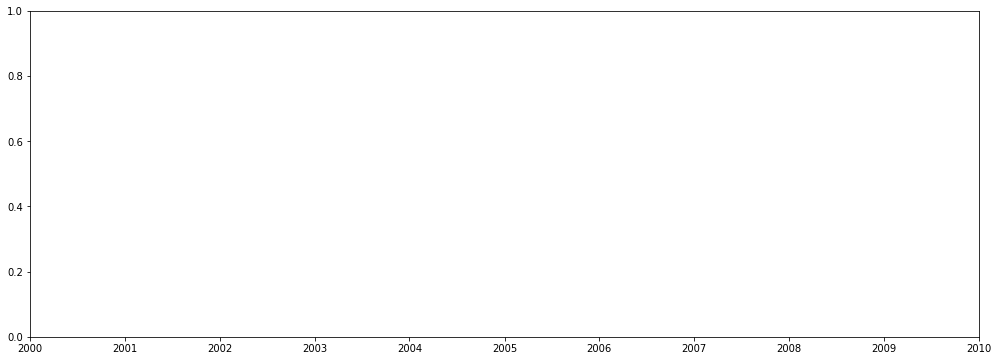

In [ ]:
plt.figure(figsize=(17,6))

plt.plot(X, Y, 'dodgerblue', label = 'RMS of Bearing 1 (CH0)', linewidth = 1)

# X-axis label.
plt.xlabel('Index', fontsize = 16)

# Y-axis label.
plt.ylabel('RMS of channel 0', fontsize = 16)

# Grid
# plt.grid(True)
# plt.grid(False)

# Legend for the plot.
plt.legend()

# Displays the plot.
plt.show()

I should fix the dates...

In [ ]:
Y= all_rms.loc[:,"4"]

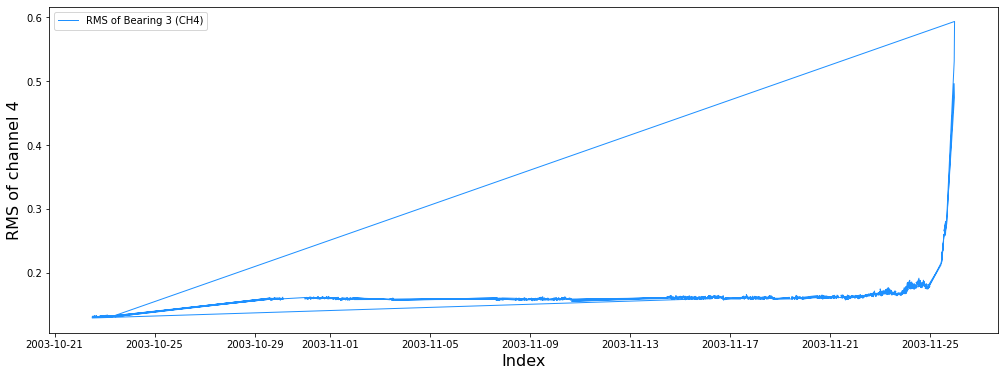

In [ ]:
plt.figure(figsize=(17,6))

plt.plot(X, Y, 'dodgerblue', label = 'RMS of Bearing 3 (CH4)', linewidth = 1)

# X-axis label.
plt.xlabel('Index', fontsize = 16)

# Y-axis label.
plt.ylabel('RMS of channel 4', fontsize = 16)

# Grid
# plt.grid(True)
# plt.grid(False)

# Legend for the plot.
plt.legend()

# Displays the plot.
plt.show()

In [ ]:
Y= all_rms.loc[:,"5"]

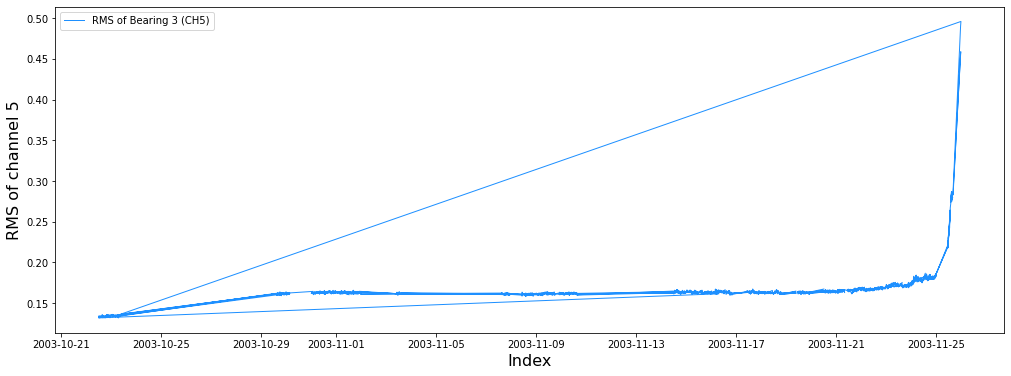

In [ ]:
plt.figure(figsize=(17,6))

plt.plot(X, Y, 'dodgerblue', label = 'RMS of Bearing 3 (CH5)', linewidth = 1)

# X-axis label.
plt.xlabel('Index', fontsize = 16)

# Y-axis label.
plt.ylabel('RMS of channel 5', fontsize = 16)

# Grid
# plt.grid(True)
# plt.grid(False)

# Legend for the plot.
plt.legend()

# Displays the plot.
plt.show()

## Graphs with fixed dates

### Computation

In [ ]:
reordered_data = all_rms.sort_values(
   by="Filename",
   key=lambda x: np.argsort(index_natsorted(all_rms["Filename"]))
)

In [ ]:
reordered_data.loc[:,"Filename"] = reordered_data.loc[:,"Filename"].apply(parseFilenameToDate)
reordered_data

<ipython-input-44-0e3220b6247c>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reordered_data.loc[:,"Filename"] = reordered_data.loc[:,"Filename"].apply(parseFilenameToDate)


,Filename,0,1,2,3,4,5,6,7
2001,2003-10-22 12:06:24,3.068659,5.487772,2.060324,2.112178,3.823492,5.168065,3.932149,3.696348
2000,2003-10-22 12:09:13,3.248408,2.858882,3.035532,3.307903,2.269229,3.796395,2.789162,3.166187
2003,2003-10-22 12:14:13,4.374851,3.265679,4.360249,3.775388,3.650533,4.493416,3.516810,4.071858
2002,2003-10-22 12:19:13,3.726450,5.249605,4.369458,3.398062,3.421512,3.811342,3.577065,2.544396
2004,2003-10-22 12:24:13,4.429711,4.379171,3.241618,3.336740,3.756384,4.703103,3.550910,3.862708
...,...,...,...,...,...,...,...,...,...
996,2003-11-25 16:07:32,5.391978,3.021559,3.050255,3.494339,2.873086,4.327358,3.064648,2.416080
999,2003-11-25 23:13:21,2.491804,2.774110,1.720517,2.243548,6.601098,13.003454,2.079030,4.116043
994,2003-11-25 23:19:56,2.741010,2.138800,5.314116,2.096539,16.072021,6.469564,4.660515,5.260378
995,2003-11-25 23:29:56,4.806230,6.261731,4.902983,4.445624,3.771858,6.551451,6.191155,9.825368


In [ ]:
X = reordered_data.loc[:,"Filename"]
Y = reordered_data.loc[:,f"{channel - 1}"]

### Results

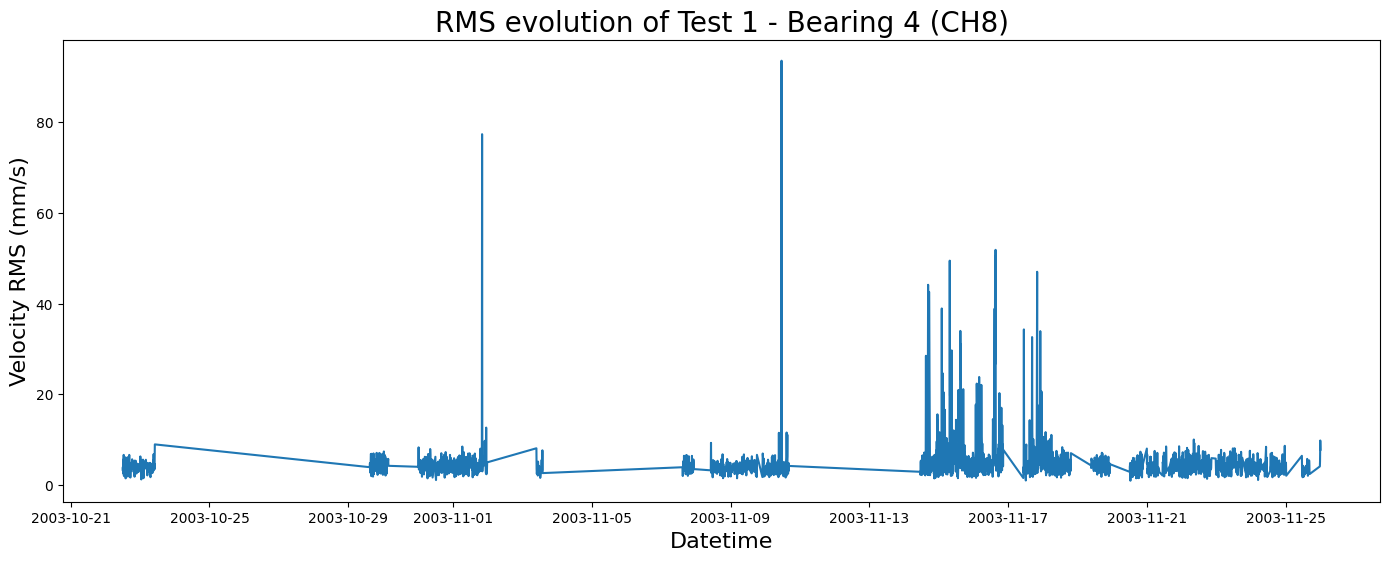

In [ ]:
plt.figure(figsize=(17,6))

#plt.scatter(X, Y, c='dodgerblue', label = f'RMS of Bearing {bearing} (CH{channel})', linewidth = 0.1)

plt.plot(X, Y)

#plt.plot (X, Y, 'green', linewidth = 0.2)

# X-axis label.
plt.xlabel('Datetime', fontsize = 16)

# Y-axis label.
plt.ylabel(f'Velocity RMS (mm/s)', fontsize = 16)

plt.title(f'RMS evolution of Test {test} - Bearing {bearing} (CH{channel})', fontsize = 20)

# Displays the plot.
plt.show()

In [ ]:
reordered_data

,Filename,0,1,2,3
6007,2004-03-04 09:27:46,2.328026,2.133527,1.850454,2.786296
6004,2004-03-04 09:32:46,2.715131,3.353833,1.481665,1.609627
6008,2004-03-04 09:42:46,1.195718,2.054011,1.125469,3.028827
6001,2004-03-04 09:52:46,4.974777,6.160984,2.498490,2.135966
6000,2004-03-04 10:02:46,2.269075,1.561583,1.715397,1.663348
...,...,...,...,...,...
993,2004-04-18 02:02:55,1.174672,1.375939,24.815157,1.611162
983,2004-04-18 02:12:55,1.499966,1.476586,9.229391,2.333371
995,2004-04-18 02:22:55,1.921164,1.650795,98.199024,1.478748
998,2004-04-18 02:32:55,3.169191,1.143316,89.106880,2.414869
